#1.3 Distributed optimization - ADMM Implementation (40 points)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t = 40 
eta = 2

In [ ]:
#Function: 
def f_1(u):
  return (2*(u-1)**2)-u**2

def f_2(u):
  return (4*(u+1)**2)-u**2

def f(u):
  return f_1(u) + f_2(u)

In [ ]:
#ADMM
def locally_compute_w_j_tplus1(current_t,index):
    if index == 1:
      return (2.*w[current_t]-a_1[current_t]+4)/4 #return w_1[t+1] 
    elif index == 2:
      return (2.*w[current_t]-a_2[current_t]-8)/8 #return w_2[t+1]
    else:
      print("entered wrong index for locally_compute_w_j")
    return


def globaly_compute_w_tplus1(w_1,w_2,current_t):
    return ((a_1[current_t]+a_2[current_t])/4) + (1/2)*(w_1[current_t+1] + w_2[current_t+1]) #returns w[t+1] 


def locally_update_a_j_tplus1(current_t,index):
    if index == 1:
      return a_1[current_t]-(eta*(w[current_t+1]-w_1[current_t+1])) #compute a_1[t+1] 
    elif index == 2:
      return a_2[current_t]-(eta*(w[current_t+1]-w_2[current_t+1])) #compute a_2[t+1]
    else:
      print("entered wrong index for locally_update_a_j_tplus1")
    return


In [ ]:
#global:
w = np.zeros(t)
#local vars for machine 1:
w_1 = np.zeros(t)
a_1 = np.zeros(t)
#local vars for machine 2:
w_2 = np.zeros(t)
a_2 = np.zeros(t)

def core_ADMM():
  for i in range(t):
    if i+1 !=t:
      # w_1[i+1] = (2.*w[i]-a_1[i]+4)/4
      # w_2[i+1] = (2.*w[i]-a_2[i]-8)/8
      # w[i+1]  = ((a_1[i]+a_2[i])/4) + (1/2)*(w_1[i+1] + w_2[i+1])
      # a_1[i+1] = a_1[i]-(eta*(w[i+1]-w_1[i+1]))
      # a_2[i+1] = a_2[i]-(eta*(w[i+1]-w_2[i+1]))

      w_1[i+1] = locally_compute_w_j_tplus1(i,1)
      w_2[i+1] = locally_compute_w_j_tplus1(i,2)
      w[i+1]  = globaly_compute_w_tplus1(w_1,w_2,i)
      a_1[i+1] = locally_update_a_j_tplus1(i,1)
      a_2[i+1] = locally_update_a_j_tplus1(i,2)
  return w,w_1,w_2,a_1,a_2

In [ ]:
w,w_1,w_2,a_1,a_2 = core_ADMM()
w,w_1,w_2,a_1,a_2

(array([ 0.        ,  0.        , -0.125     , -0.25      , -0.34375   ,
        -0.40625   , -0.4453125 , -0.46875   , -0.48242188, -0.49023438,
        -0.49462891, -0.49707031, -0.49841309, -0.49914551, -0.49954224,
        -0.49975586, -0.4998703 , -0.49993134, -0.49996376, -0.49998093,
        -0.49998999, -0.49999475, -0.49999726, -0.49999857, -0.49999925,
        -0.49999961, -0.4999998 , -0.4999999 , -0.49999995, -0.49999997,
        -0.49999999, -0.49999999, -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.5       , -0.5       , -0.5       , -0.5       ]),
 array([ 0.        ,  1.        ,  0.5       ,  0.125     , -0.125     ,
        -0.28125   , -0.375     , -0.4296875 , -0.4609375 , -0.47851562,
        -0.48828125, -0.49365234, -0.49658203, -0.49816895, -0.49902344,
        -0.4994812 , -0.49972534, -0.49985504, -0.49992371, -0.49995995,
        -0.49997902, -0.49998903, -0.49999428, -0.49999702, -0.49999845,
        -0.4999992 , -0.49999958, -0.49999978, -0

Text(0.5, 1.0, 'w versus t')

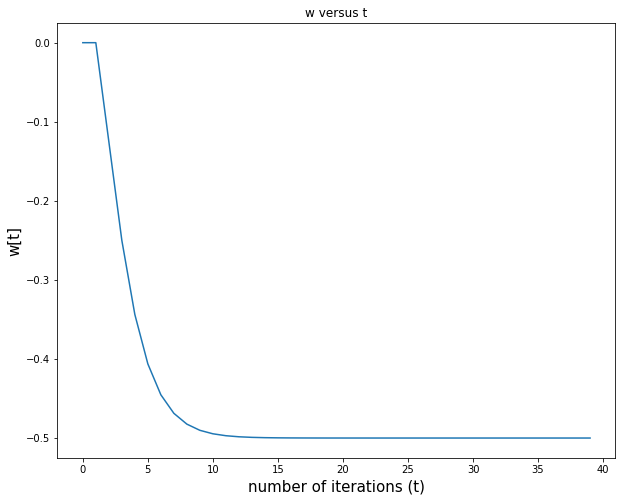

In [ ]:
#Graph:
plt.figure(figsize = (10,8))
plt.plot(w)
plt.xlabel(r'number of iterations (t)', fontsize = 15)
plt.ylabel(r'w[t]', fontsize = 15)
plt.title("w versus t")

Text(0.5, 1.0, 'w_1 versus t')

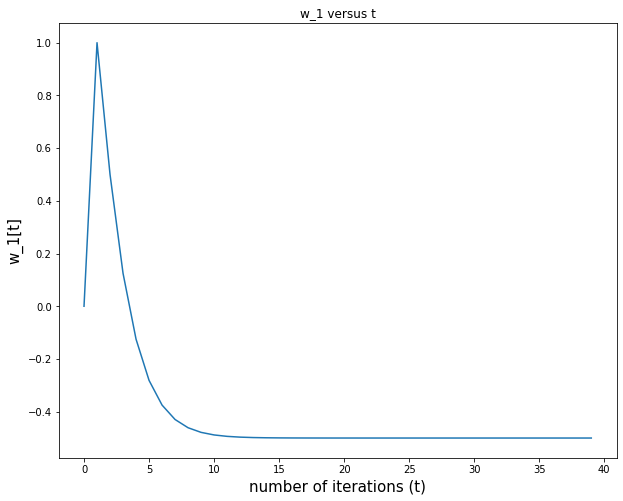

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(w_1)
plt.xlabel(r'number of iterations (t)', fontsize = 15)
plt.ylabel(r'w_1[t]', fontsize = 15)
plt.title("w_1 versus t")

Text(0.5, 1.0, 'w_2 versus t')

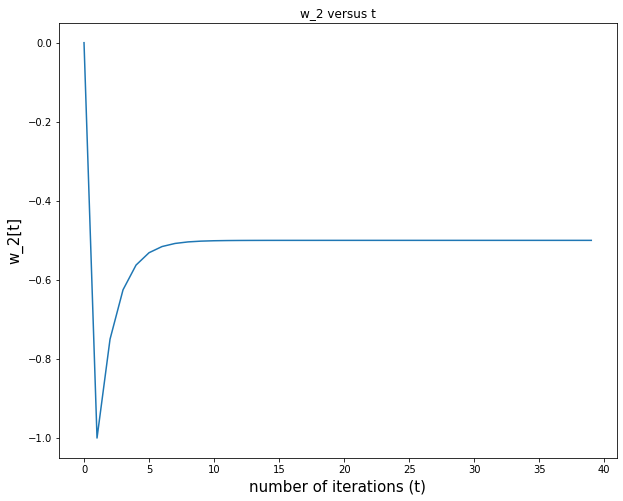

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(w_2)
plt.xlabel(r'number of iterations (t)', fontsize = 15)
plt.ylabel(r'w_2[t]', fontsize = 15)
plt.title("w_2 versus t")

Text(0.5, 1.0, 'a_1 versus t')

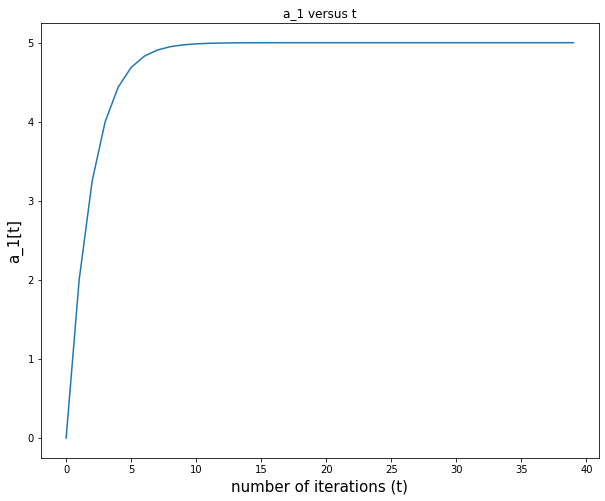

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(a_1)
plt.xlabel(r'number of iterations (t)', fontsize = 15)
plt.ylabel(r'a_1[t]', fontsize = 15)
plt.title("a_1 versus t")

Text(0.5, 1.0, 'a_2 versus t')

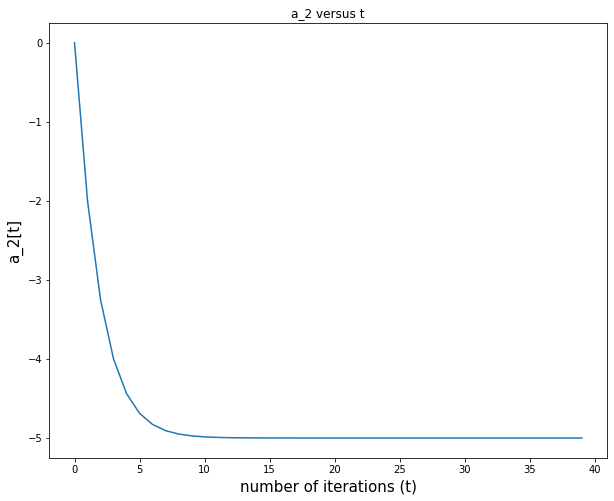

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(a_2)
plt.xlabel(r'number of iterations (t)', fontsize = 15)
plt.ylabel(r'a_2[t]', fontsize = 15)
plt.title("a_2 versus t")